<a href="https://colab.research.google.com/github/ciaoCiao100/Prova1/blob/master/Weather_Radar_Station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#!apt-get -qq install -y libfluidsynth1
#!pip install matplotlib===3.5.3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import math
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from itertools import cycle
from sklearn import svm, datasets

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
from sklearn import metrics


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def recuperaPerformance(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  precision=0
  recall=0
  f1=0
  accuracy=0
  specifity=0
  for c in range(2):
      tp = cm[c,c]
      fp = sum(cm[:,c]) - cm[c,c]
      fn = sum(cm[c,:]) - cm[c,c]
      tn = sum(np.delete(sum(cm)-cm[c,:],c))
      _precision = tp/(fp+tp)
      _recall = tp/(fn+tp)
      _f1 = (2*_precision*_recall)/(_precision+_recall)
      _accuracy = (tp+tn)/(tn+fp+fn+tp)
      _specifity = tn/(fp+tn)
      _precision = 0 if np.isnan(_precision) else _precision
      _recall = 0 if np.isnan(_recall) else _recall
      _f1 = 0 if np.isnan(_f1) else _f1
      _accuracy = 0 if np.isnan(_accuracy) else _accuracy
      _specifity = 0 if np.isnan(_specifity) else _specifity
      precision = precision+_precision
      recall = recall+_recall
      f1 = f1+_f1
      accuracy = accuracy+_accuracy
      specifity = specifity+_specifity

#print("for class {}: recall {}, specificity {}\
#precision {}, f1 {}".format(c,round(recall,4), round(specificity,4),round(precision,4),round(f1_score,4)))

  return precision/2, recall/2, f1/2, accuracy/2, specifity/2


In [ ]:
def plotPerformance(scores, titolo):
  print(scores)
  labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'Specificity']
  DT_value = scores[0]
  NB_value = scores[1]
  SVC_value = scores[2]
  x = np.arange(len(labels))
  width = 0.20
  fig, ax = plt.subplots()
  rectsDT = ax.bar(x - width, DT_value, width, label='DT',color='#7F7F7F')
  rectsNB = ax.bar(x, NB_value, width, label='NB', color='#FE9900')
  rectsSVC = ax.bar(x + width, SVC_value, width, label='SVC',color='#77933C')
  ax.set_ylabel('Misure %')
  ax.set_xticks(x, labels)
  ax.legend()
  ax.bar_label(rectsDT, padding=3, rotation=90)
  ax.bar_label(rectsNB, padding=3, rotation=90)
  ax.bar_label(rectsSVC, padding=3, rotation=90)
  fig.tight_layout()
  plt.legend(loc=(1.04,0))
  plt.title(titolo)
  plt.show()

In [ ]:
path = "/content/drive/MyDrive/Weather_Radar_Stations.csv"
df= pd.read_csv(path)
df


,X,Y,OBJECTID,siteID,siteName,radarType,antennaElevation
0,-98.413046,45.455833,1,KABR,ABERDEEN,NEXRAD,0
1,-106.823880,35.149722,2,KABX,ALBUQUERQUE,NEXRAD,0
2,-77.007491,36.983889,3,KAKQ,NORFOLK,NEXRAD,0
3,-101.709269,35.233333,4,KAMA,AMARILLO,NEXRAD,0
4,-80.413048,25.610556,5,KAMX,MIAMI,NEXRAD,0
...,...,...,...,...,...,...,...
196,-66.179000,18.474000,197,TSJU,San Juan,TDWR,157
197,-111.930000,40.967000,198,TSLC,Salt Lake City,TDWR,4295
198,-90.489000,38.805000,199,TSTL,St. Louis,TDWR,647
199,-82.518000,27.860000,200,TTPA,Tampa Bay,TDWR,93


In [ ]:
df.dtypes

X                   float64
Y                   float64
OBJECTID              int64
siteID               object
siteName             object
radarType            object
antennaElevation      int64
dtype: object

In [ ]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df.dtypes

X                   float32
Y                   float32
OBJECTID              int64
siteID               object
siteName             object
radarType            object
antennaElevation      int64
dtype: object

In [ ]:
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)
df.dtypes

X                   float32
Y                   float32
OBJECTID              int32
siteID               object
siteName             object
radarType            object
antennaElevation      int32
dtype: object

In [ ]:
df['radarType'].replace(to_replace=['NEXRAD','TDWR'], value=[0, 1], inplace=True)
df.rename(columns = {'radarType':'Class'}, inplace = True)
df


,X,Y,OBJECTID,siteID,siteName,Class,antennaElevation
0,-98.413048,45.455833,1,KABR,ABERDEEN,0,0
1,-106.823883,35.149723,2,KABX,ALBUQUERQUE,0,0
2,-77.007492,36.983891,3,KAKQ,NORFOLK,0,0
3,-101.709267,35.233334,4,KAMA,AMARILLO,0,0
4,-80.413048,25.610556,5,KAMX,MIAMI,0,0
...,...,...,...,...,...,...,...
196,-66.179001,18.474001,197,TSJU,San Juan,1,157
197,-111.930000,40.966999,198,TSLC,Salt Lake City,1,4295
198,-90.488998,38.805000,199,TSTL,St. Louis,1,647
199,-82.517998,27.860001,200,TTPA,Tampa Bay,1,93


In [ ]:
for col in df:
  print(col + " " + str(len(df[col].unique())))
df.drop(columns=['siteID','siteName'], inplace = True)
df.dtypes

X 201
Y 201
OBJECTID 201
siteID 201
siteName 201
Class 2
antennaElevation 46


X                   float32
Y                   float32
OBJECTID              int32
Class                 int64
antennaElevation      int32
dtype: object

In [ ]:


#df['antennaElevation'] = df['antennaElevation'].apply(lambda x: float(x.split()[0].replace('Unknown','')))
df['antennaElevation'] = df['antennaElevation'].astype(float)

In [ ]:
df.insert(len(df.columns)-1, 'Class', df.pop('Class'))

df

,X,Y,OBJECTID,antennaElevation,Class
0,-98.413048,45.455833,1,0.0,0
1,-106.823883,35.149723,2,0.0,0
2,-77.007492,36.983891,3,0.0,0
3,-101.709267,35.233334,4,0.0,0
4,-80.413048,25.610556,5,0.0,0
...,...,...,...,...,...
196,-66.179001,18.474001,197,157.0,1
197,-111.930000,40.966999,198,4295.0,1
198,-90.488998,38.805000,199,647.0,1
199,-82.517998,27.860001,200,93.0,1


[[100.0, 100.0, 100.0, 100.0, 100.0], [100.0, 100.0, 100.0, 100.0, 100.0], [94.0, 98.0, 96.0, 98.0, 98.0]]


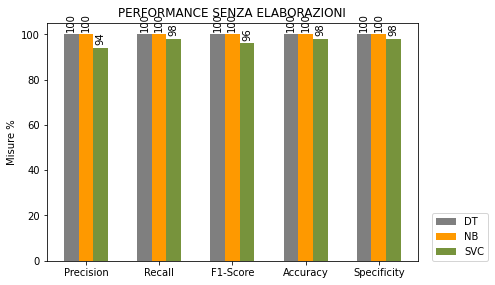

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
_y_test=y_test.to_numpy()
decisionTree = DecisionTreeClassifier()
naiveBayes = GaussianNB()
svc =  LinearSVC()
#randomForest = RandomForestClassifier(n_estimators=10)

classifiers=[decisionTree, naiveBayes,svc]
#classifiers=[decisionTree, naiveBayes]
scores = []
for classificatore in classifiers:
  classificatore.fit(X_train, y_train)
  y_pred = classificatore.predict(X_test)
  precision, recall, f1, accuracy, specifity = recuperaPerformance(_y_test,y_pred)
  score = []
  score.append(round(precision,2)*100)
  score.append(round(recall,2)*100)
  score.append(round(f1,2)*100)
  score.append(round(accuracy,2)*100)
  score.append(round(specifity,2)*100)
  scores.append(score)
plotPerformance(scores, 'PERFORMANCE SENZA ELABORAZIONI')
